In [133]:
import numpy as np
import pandas as pd

In [134]:
price_determinant = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(price_determinant)
df.columns = headers
df.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875


In [135]:
df.replace("?",np.nan, inplace=True)
df.dropna(subset=['price'],axis=0,inplace=True) 
#drop the whole row where price is null as this is what we are trying to predict
df.shape

(200, 26)

In [136]:
missingdata = df.isnull()
for column in missingdata.columns.values.tolist():
    print(column)
    print(missingdata[column].value_counts())
    print()

symboling
False    200
Name: symboling, dtype: int64

normalized-losses
False    164
True      36
Name: normalized-losses, dtype: int64

make
False    200
Name: make, dtype: int64

fuel-type
False    200
Name: fuel-type, dtype: int64

aspiration
False    200
Name: aspiration, dtype: int64

num-of-doors
False    198
True       2
Name: num-of-doors, dtype: int64

body-style
False    200
Name: body-style, dtype: int64

drive-wheels
False    200
Name: drive-wheels, dtype: int64

engine-location
False    200
Name: engine-location, dtype: int64

wheel-base
False    200
Name: wheel-base, dtype: int64

length
False    200
Name: length, dtype: int64

width
False    200
Name: width, dtype: int64

height
False    200
Name: height, dtype: int64

curb-weight
False    200
Name: curb-weight, dtype: int64

engine-type
False    200
Name: engine-type, dtype: int64

num-of-cylinders
False    200
Name: num-of-cylinders, dtype: int64

engine-size
False    200
Name: engine-size, dtype: int64

fuel-system
Fa

In [137]:
#replace missing values in "num-of-doors" with the most occured(frequency)
num1 = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, num1, inplace=True)
print(num1)

four


In [138]:
#replace missing values of int-type variables with the mean or average value
avg_losses = df["normalized-losses"].astype("float").mean(axis=0)
print(avg_losses)
df['normalized-losses'].replace(np.nan, avg_losses, inplace=True)

122.0


In [139]:
avgStroke = df['stroke'].astype("float").mean(axis=0)
print(avgStroke)
df['stroke'].replace(np.nan, avgStroke, inplace=True)

3.2598469387755036


In [140]:
avgBore = df['bore'].astype("float").mean(axis=0)
df['bore'].replace(np.nan, avgBore, inplace=True)
print(avgBore)

3.3300000000000005


In [141]:
avgPower = df['horsepower'].astype("float").mean(axis=0)
df['horsepower'].replace(np.nan, avgPower, inplace=True)
print(avgPower)

103.35858585858585


In [142]:
avgRPM = df['peak-rpm'].astype("float").mean(axis=0)
df['peak-rpm'].replace(np.nan, avgRPM, inplace=True)
print(avgRPM)

5118.181818181818


In [143]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [144]:
df['normalized-losses'] = df['normalized-losses'].astype("int")
df[['bore','stroke','price','horsepower']] = df[['bore','stroke','price','horsepower']].astype('float')

In [145]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500,19,25,15250.0


In [146]:
#DATA STANDARDIZATION
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-new'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-new,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000,21,8.703704,16500.0
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000,19,9.038462,16500.0
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500,24,7.833333,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500,18,10.681818,17450.0
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500,19,9.400000,15250.0


In [147]:
#According to the example above, normalize the column "height","width", and "length"
df['height'] = df['height']/df['height'].max()
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.822681,0.909722,0.876254
2,0.848630,0.919444,0.908027
3,0.848630,0.922222,0.908027
4,0.851994,0.920833,0.887960


In [148]:
df['horsepower'] = df['horsepower'].astype('int')
df['horsepower'].head()

0    111
1    154
2    102
3    115
4    110
Name: horsepower, dtype: int32

Text(0.5, 1.0, 'horsepower bins')

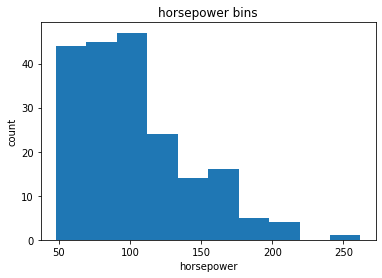

In [149]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

#Define the x and y labels below, as well as the title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

In [150]:
#used for getting bins of equal size bandwidth
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [151]:
groupnames=['low','medium','high']
df['horsepower_binned']= pd.cut(df['horsepower'], bins, labels=groupnames, include_lowest=True)
df[['horsepower','horsepower_binned']].head(20)

,horsepower,horsepower_binned
0,111,low
1,154,medium
2,102,low
3,115,low
4,110,low
5,110,low
6,110,low
7,140,medium
9,101,low
10,101,low


In [152]:
df['horsepower_binned'].value_counts()

low       152
medium     43
high        5
Name: horsepower_binned, dtype: int64

Text(0, 0.5, 'counts')

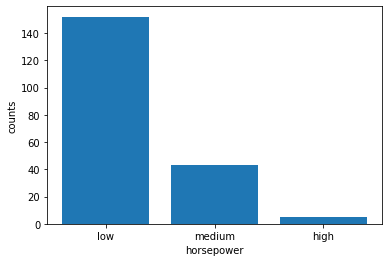

In [153]:
plt.pyplot.bar(groupnames, df['horsepower_binned'].value_counts())
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('counts')

Text(0.5, 1.0, 'horsepower bins')

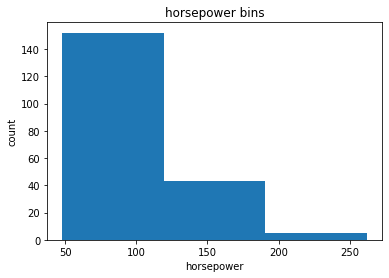

In [154]:
#a = (0,1,2)
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [155]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-new,price,horsepower_binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,16500.0,low
1,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,9.038462,16500.0,medium
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,7.833333,13950.0,low
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,10.681818,17450.0,low
4,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500,19,9.400000,15250.0,low


In [156]:
#INDICATOR VARIABLE OR DUMMY VARIABLE
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [157]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-new,price,horsepower_binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000,21,8.703704,16500.0,low,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000,19,9.038462,16500.0,medium,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500,24,7.833333,13950.0,low,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500,18,10.681818,17450.0,low,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,3.40,8.5,110,5500,19,9.400000,15250.0,low,0,1


In [158]:
df.shape
#df.to_csv("clean.csv")

(200, 28)